# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов!

Данные мы будем использовать из Kaggle соревнования: https://www.kaggle.com/competitions/nlp-getting-started/data 


Оттуда надо скачать файл train.csv. На обучающую и тестовую выборки его поделим кодом ниже, менять его не надо!

Мы будем работать с датасетом постов из твиттера. Нам предстоит решать задачу бинарной классификации - определять содержатся ли в твитте информация о настоящей катастрофе/инциденте или нет.

In [64]:
import numpy as np
import pandas as pd
from typing import  List
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation
import seaborn as sns

In [65]:
data = pd.read_csv('train.csv')

In [66]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [67]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [68]:
data.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [69]:
data['location'] = data['location'].fillna("")
data['keyword'] = data['keyword'].fillna("")
data.isna().sum()

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

In [70]:
data.head()

,id,keyword,location,text,target
0,1,,,Our Deeds are the Reason of this #earthquake M...,1
1,4,,,Forest fire near La Ronge Sask. Canada,1
2,5,,,All residents asked to 'shelter in place' are ...,1
3,6,,,"13,000 people receive #wildfires evacuation or...",1
4,7,,,Just got sent this photo from Ruby #Alaska as ...,1


## Задание 2 (1 балл)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Какое распределение классов в обучающей выборке?


In [71]:
data['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

**Вывод:** Выборка в принципе сбалансирована


2. Посмотрите на колонку "keyword" - возьмите 10 наиболее встречающихся значений, постройте ступенчатую диаграмму распределения классов в зависимости от значения keyword, сделайте выводы.

In [72]:
popular_keywords = data['keyword'].value_counts(sort=True)[1:11].index.tolist()
popular_keywords

['fatalities',
 'deluge',
 'armageddon',
 'sinking',
 'damage',
 'harm',
 'body%20bags',
 'evacuate',
 'fear',
 'outbreak']

In [73]:
data[data['keyword'].isin(popular_keywords)]

,id,keyword,location,text,target
304,446,armageddon,"California, United States",#PBBan (Temporary:300) avYsss @'aRmageddon | D...,0
305,447,armageddon,"California, United States",#PBBan (Temporary:300) Russaky89 @'aRmageddon ...,0
306,448,armageddon,#FLIGHTCITY UK,((OFFICIAL VID)) #DoubleCups &gt;&gt; https://...,0
307,450,armageddon,,ouvindo Peace Love &amp; Armageddon,0
308,451,armageddon,,Best movie you've ever seen? - Armageddon htt...,0
...,...,...,...,...,...
6121,8737,sinking,London,Slowly sinking wasting ?? @edsheeran,0
6122,8738,sinking,Rhyme Or Reason?,The #Tribe just keeps sinking everyday it seem...,1
6123,8739,sinking,MA,that horrible sinking feeling when youÛªve be...,1
6124,8740,sinking,hey Georgia,each time we try we always end up sinking,0


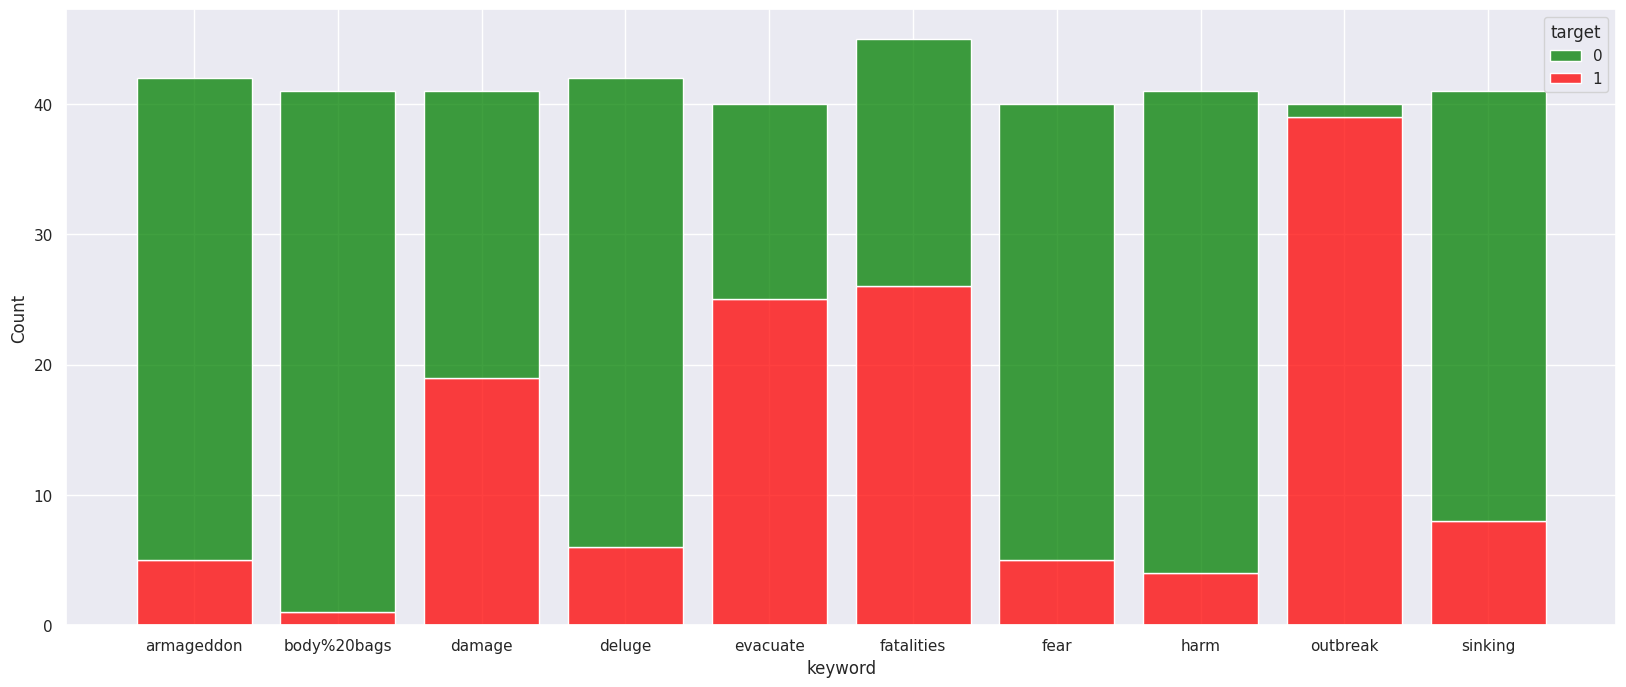

In [74]:
sns.histplot(data=data, x=data[data['keyword'].isin(popular_keywords)]['keyword'], hue="target", multiple='stack', shrink=.8, palette=['green', 'red']);
sns.set(rc={'figure.figsize':(20, 8)})

**Выводы**: Если в тексте встретилось одно из следующих слов: **armageddon, body%20bags, deluge, fear, harm, sinking**, то, вероятнее всего, что в тексте говорится об инциденте. Если же в тексте встретилось слово **outbreak**, то, скорей всего, в тексте про инцидент не упоминается. Про остальные слова однозначно что-то сказать трудно.

## Задание 3 (0.5 балла) 

В этом задании предлагается объединить все три текстовых столбца в один (просто сконкатенировать cтроки) и убрать столбец с индексом.

In [75]:
train.loc[[6590, 7122, 2769]]

,id,keyword,location,text,target
6590,9436,survivors,"Marietta, GA",Stemming from my #Cubs talk- the team rosters ...,1
7122,10203,violent%20storm,NaN,If you were the NWS wth a rotating storm w/ a ...,1
2769,3980,devastation,Atlanta g.a.,http://t.co/Gxgm1T3W0J From Devastation to Ela...,0


In [76]:
train_new = pd.DataFrame(
    np.column_stack(
        [(train['keyword'] if not train['keyword'].isna().any() else "") + 
     (train['location'] if not train['location'].isna().any() else "") + ' ' + train['text'], train['target']]), 
     index = train.index, 
     columns=['text', 'target'])
train_new.isna().sum()

text      0
target    0
dtype: int64

In [77]:
#Сразу сконкатенируем столбцы в тестовом датафрейме
test_new = pd.DataFrame(
    np.column_stack(
        [(test['keyword'] if not test['keyword'].isna().any() else "") + 
     (test['location'] if not test['location'].isna().any() else "") + ' ' + test['text'], test['target']]), 
     index = test.index, 
     columns=['text', 'target'])
test_new.isna().sum()

text      0
target    0
dtype: int64

In [78]:
train_new.loc[[6590, 7122, 2769]]

,text,target
6590,Stemming from my #Cubs talk- the team rosters...,1
7122,If you were the NWS wth a rotating storm w/ a...,1
2769,http://t.co/Gxgm1T3W0J From Devastation to El...,0


## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [79]:
from sklearn.feature_extraction.text import CountVectorizer

cnt_vec = CountVectorizer()
X = cnt_vec.fit_transform(train['text'])
X.toarray().shape

(5329, 16937)

## Задание 5 (1 балл)

В предыдущем пункте у вас должна была получиться достаточно большая матрица.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов, ссылок и прочего мусора.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле vocabulary_ инстанса этого класса. Давайте напишем функцию, которая печает ответы на следующие вопросы:

1. Найдите в этом словаре все слова, которые содержат цифры. Сколько таких слов нашлось?

2. Найдите все слова, которые содержат символы пунктуации. Сколько таких слов нашлось? 

3. Сколько хэштегов (токен начинается на #) и упоминаний (токен начинается на @) осталось в словаре?

In [80]:
def contains_digit(s: str) -> bool:
    # Проверка, содержит ли слово цифры

    for digit in '0123456789':
        if digit in s:
            return True
    return False

def contains_punctuation(s: str) -> bool:
    # Проверка, содержит ли слово пунктуацию 

    for i in s:
        if i in punctuation:
            return True
    return False

def is_hashtag(s: str) -> bool:
    # Проверка, является ли слово хэштегом

    if s[0] == "#":
        return True
    return False

def is_mention(s: str) -> bool:
    # Проверка, является ли слово упоминанием
    
    if s[0] == "@":
        return True
    return False

def investigate_vocabulary(vocabulary):
    digit = 0
    punct = 0
    hasht = 0
    ment = 0
    for word in vocabulary:
        digit += contains_digit(word)
        punct += contains_punctuation(word)
        hasht += is_hashtag(word)
        ment += is_mention(word)
    print('With digit:      ', digit
          )
    print('With punctuation:', punct
          )
    print('Hashtags:        ', hasht
          )
    print('Mentions:        ', ment
          )




In [81]:
dummy_vocab = {'th1nk' : 0,
               'think333' : 1,
               'think.' : 2,
               'th!nk' : 3,
               'th...nk' : 4,
               '#think' : 5,
               '@think' : 6,
               '@thinking':7,
               '@nothink' : 8,
               'think' : 9}
investigate_vocabulary(dummy_vocab)

With digit:       2
With punctuation: 7
Hashtags:         1
Mentions:         3


In [82]:
investigate_vocabulary(cnt_vec.vocabulary_)

With digit:       3663
With punctuation: 300
Hashtags:         0
Mentions:         0


## Задание 6 (0.5 балла)

Вспомним, что на семинаре по текстам мы узнали, что в nltk есть специальный токенизатор для текстов - TweetTokenizer. Попробуем применить CountVectorizer с этим токенизатором. Ответьте на все вопросы из предыдущего пункта для TweetTokenizer и сравните результаты.

In [83]:
from nltk.tokenize import TweetTokenizer
import nltk
# Чтобы узнать, какие параметры есть у этого токенайзера - используйте help(TweetTokenizer)
# Для того, чтобы передать токенайзер в CountVectorizer используйте параметр tokenizer

In [84]:
tw = CountVectorizer(tokenizer=TweetTokenizer().tokenize)
X_tw = tw.fit_transform(train['text'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [85]:
investigate_vocabulary(tw.vocabulary_)

With digit:       3781
With punctuation: 7136
Hashtags:         1440
Mentions:         1669


**Сравнение:** TweetTokenizer более информативный, так как обнаружил упоминания и хештеги, в отличии от обычного CountVectorizer

## Задание 7 (2 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью TweetTokenizer из пакета nltk
2. Удалит все токены содержащие не латинские буквы, кроме смайликов (будем считать ими токены содержащие только пунктуацию и, как минимум, одну скобочку) и хэштегов, которые после начальной # содержат только латинские буквы.
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords.words('english')
4. Проведет стемминг с помощью SnowballStemmer



In [86]:
import nltk
from nltk.stem.snowball import SnowballStemmer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [87]:
def contains_only_latin_letters(s: str) -> bool:
    # Проверка, содержит ли слово только латинские буквы
    for i in s:
        if i not in 'abcdefghigklmnopqrstuvwxyz':
            return False
    return True

def is_emoji(s: str) -> bool:
    # Проверка, является ли слово смайликом
    if contains_punctuation(s) and ('(' in s or ')' in s):
        return True
    return False

def is_hashtag(s: str) -> bool:
    # Проверка, является ли слово хэштегом
    if s[0] == '#' and contains_only_latin_letters(s[1:]):
        return True
    return False
    

def custom_tokenizer(s: str) -> List[str]:    
    # Кастомный токенайзер
    words = TweetTokenizer().tokenize(s)
    res = np.array([])
    for word in words:
        word = word.lower()
        if is_emoji(word) or is_hashtag(word) or contains_only_latin_letters(word):
            if word not in nltk.corpus.stopwords.words('english'):
                res = np.append(res, word)
    stemmer = SnowballStemmer('english')
    res_stemmed = [stemmer.stem(w) for w in res]
    return res_stemmed
  

In [88]:
custom_tokenizer('She LOVES painting :-) #art')

['love', 'paint', ':-)', '#art']

Продемонстрируйте работу вашей функции на первых десяти текстах в обучающей выборке.

In [89]:
for row in train.loc[train.index[:10]]['text']:
    print(custom_tokenizer(row))

['ash', 'australia', 'collaps', 'trent', 'bridg', 'among', 'worst', 'histori', 'england', 'bundl', 'australia']
['great', 'michigan', 'techniqu', 'camp', 'thank', '#goblu', '#wrestleon']
['cnn', 'tennesse', 'movi', 'theater', 'shoot', 'suspect', 'kill', 'polic']
['still', 'riot', 'coupl', 'hour', 'left', 'class']
['crack', 'path', 'wipe', 'morn', 'beach', 'run', 'surfac', 'wound', 'left', 'elbow', 'right', 'knee']
['expert', 'franc', 'begin', 'examin', 'airplan', 'debri', 'found', 'reunion', 'island', 'french', 'air', 'accid', 'expert', '#mlb']
['came', 'kill', 'indian', 'fun', 'video', 'smirk', 'remorseless', 'pakistani', 'killer', 'show', 'boast']
['except', 'idk', 'realli', 'burn']
['destroy', 'hous']
['polic', 'offic', 'wound', 'suspect', 'dead', 'exchang', 'shot']


## Задание 8 (1 балл)

1. Примените CountVectorizer с реализованным выше токенизатором к обучающим и тестовым выборкам.


In [90]:
vectorizer = CountVectorizer(tokenizer=custom_tokenizer)

bow = vectorizer.fit_transform(train_new['text'])
bow_test = vectorizer.transform(test_new['text'])

2. Обучите LogisticRegression на полученных признаках.


In [91]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=200, random_state=42)
clf.fit(bow, list(train_new['target'][:]))

LogisticRegression(max_iter=200, random_state=42)

3. Посчитайте метрику f1-score на тестовых данных.

In [92]:
from sklearn.metrics import f1_score

pred = clf.predict(bow_test)
print(f1_score(list(test_new['target'][:]), pred))

0.7495890410958904


## Задание 9 (1 балл)

1. Повторите 8 задание, но с tf-idf векторизатором. Как изменилось качество?


In [120]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_td = TfidfVectorizer(tokenizer=custom_tokenizer) 

bow_td = vectorizer_td.fit_transform(train_new['text'])
bow_test_td = vectorizer_td.transform(test_new['text'])

clf_td = LogisticRegression(max_iter=200, random_state=42)
clf_td.fit(bow_td, list(train_new['target'][:]))

pred_td = clf_td.predict(bow_test_td)
print(f1_score(list(test_new['target'][:]), pred_td))
print(bow_test_td.toarray().shape)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


0.7437357630979499
(2284, 9029)


1. **Ответ:** Качество незначительно уменьшилось 

2. Мы можем еще сильнее уменьшить размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


In [121]:
vectorizer_td = TfidfVectorizer(tokenizer=custom_tokenizer, max_df=0.9) 

bow_td = vectorizer_td.fit_transform(train_new['text'])
bow_test_td = vectorizer_td.transform(test_new['text'])

clf_td = LogisticRegression(max_iter=200, random_state=42)
clf_td.fit(bow_td, list(train_new['target'][:]))

pred_td = clf_td.predict(bow_test_td)
print(f1_score(list(test_new['target'][:]), pred_td))
print(bow_test_td.toarray().shape)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


0.7437357630979499
(2284, 9029)


2. **Ответ:** Ни качество, ни размер матрицы не изменились, так как достаточно мало совпадающих токенов.

3. Также мы можем уменьшить размер матрицы, удаляя слова со слишком маленьким df. Удалось ли добиться улучшения качества? 

In [141]:
vectorizer_td = TfidfVectorizer(tokenizer=custom_tokenizer, max_df=0.9, min_df=0.0001) 

bow_td = vectorizer_td.fit_transform(train_new['text'])
bow_test_td = vectorizer_td.transform(test_new['text'])

clf_td = LogisticRegression(max_iter=200, random_state=42)
clf_td.fit(bow_td, list(train_new['target'][:]))

pred_td = clf_td.predict(bow_test_td)
print(f1_score(list(test_new['target'][:]), pred_td))
print(bow_test_td.toarray().shape)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


0.7437357630979499
(2284, 9029)


3. **Ответ:** Я поперебирал различные значения max_df и min_df, к сожалению, была либо сильная просадка по качеству (~0.249), либо небольшое снижение как тут.

## Задание 10 (1 балл)

Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 8 с HashingVectorizer, укажите количество фичей равное 5000.


In [151]:
from sklearn.feature_extraction.text import HashingVectorizer
vectorizer_hash = HashingVectorizer(tokenizer=custom_tokenizer, n_features=5000) 

bow_hash = vectorizer_hash.fit_transform(train_new['text'])
bow_test_hash = vectorizer_hash.transform(test_new['text'])

clf_hash = LogisticRegression(max_iter=200, random_state=42)
clf_hash.fit(bow_hash, list(train_new['target'][:]))

pred_hash = clf_hash.predict(bow_test_hash)
print(f1_score(list(test_new['target'][:]), pred_hash))
print(bow_test_hash.toarray().shape)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


0.7281053234115626
(2284, 5000)


2. Какой из подходов показал самый высокий результат?

2. **Ответ:** CountVectorizer показал чуть выше качество.

## Задание 11 (1 балл)

В этом задании нужно добиться f1 меры хотя в 0.75 на тестовых данных.

In [153]:
vectorizer = CountVectorizer(tokenizer=TweetTokenizer().tokenize)

bow = vectorizer.fit_transform(train_new['text'])
bow_test = vectorizer.transform(test_new['text'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [155]:
clf = LogisticRegression(max_iter=200)
clf.fit(bow, list(train_new['target'][:]))

pred = clf.predict(bow_test)
print(f1_score(list(test_new['target'][:]), pred))

0.7502762430939226
